In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. How many movies are listed in the titles dataframe?
2. What are the earliest two films listed in the titles dataframe?
3. How many movies have the title "Hamlet"?
4. How many movies are titled "North by Northwest"?
5. When was the first movie titled "Hamlet" made?
6. List all of the "Treasure Island" movies from earliest to most recent
7. How many movies were made in the year 1950?
8. How many movies were made from 1950 through 1959?
9. In what years has a movie titled "Batman" been released?
10. How many roles were there in the movie "Inception"?
11. Plot the number of films that have been released each decade over the history of cinema.
12. Plot the number of "Batman" characters each decade.
13. Plot the number of actor roles each year and the number of actress roles each year over the history
of film.
14. Plot how many roles Tom Hanks has played in each year of his career.
15. Plot the n­values of the roles that has played over her career.
16. Plot the n­values of the roles that Judi Dench has played over her career.
17. Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in
the USA.
18. Make a bar plot of number of movies released by each country over time.

In [4]:
titles = pd.read_csv("titles.csv")
cast = pd.read_csv("cast.csv")
release = pd.read_csv("release_dates.csv")

In [5]:
titles.head(5)

,title,year
0,The Rising Son,1990
1,Justin Bieber: Always Believing,2012
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [81]:
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [7]:
release.head(5)

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Nerealnaya lyubov,2014,Russia,2014-02-13
4,#Stuck,2014,Turkey,2014-07-01


In [8]:
titles.shape

(210591, 2)

In [11]:
titles[titles["title"] == "Hamlet"].shape

(19, 2)

In [12]:
titles[titles["title"] == "North by Northwest"].shape

(1, 2)

In [14]:
sorted(titles[titles["title"] == "Hamlet"]["year"])

[1910,
 1911,
 1913,
 1921,
 1948,
 1954,
 1964,
 1969,
 1973,
 1976,
 1987,
 1990,
 1996,
 2000,
 2009,
 2011,
 2014,
 2015,
 2016]

In [19]:
mask = titles["title"] == "Treasure Island"
ti = titles[mask]
ti.sort_values(by = "year")

,title,year
186595,Treasure Island,1918
46520,Treasure Island,1920
188082,Treasure Island,1934
88003,Treasure Island,1950
207718,Treasure Island,1972
101151,Treasure Island,1973
186007,Treasure Island,1985
162493,Treasure Island,1999


In [20]:
## docstring: ti.sort_values?
## source code: ti.sort_values??

In [21]:
titles[titles["year"] == 1950].shape

(1033, 2)

In [41]:
lower = titles["year"] >= 1950
upper = titles["year"] <= 1959
titles[list(lower.values & upper.values)].shape

(11999, 2)

In [43]:
batmans = titles["title"] == "Batman"
titles[batmans]

,title,year
50840,Batman,1989
67790,Batman,1943


In [45]:
cast[cast["title"] == "Inception"].shape[0]

72

In [59]:
titles['year'].min()

1894

In [60]:
titles['year'].max()


2024

In [63]:
print(range(1890,2030,10))

range(1890, 2030, 10)


(array([  6.00000000e+00,   3.50000000e+01,   6.32000000e+03,
          8.61300000e+03,   9.93600000e+03,   8.29500000e+03,
          1.19990000e+04,   1.63690000e+04,   1.75930000e+04,
          1.91830000e+04,   2.11860000e+04,   3.75800000e+04,
          5.34670000e+04]),
 array([1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990,
        2000, 2010, 2020]),
 <a list of 13 Patch objects>)

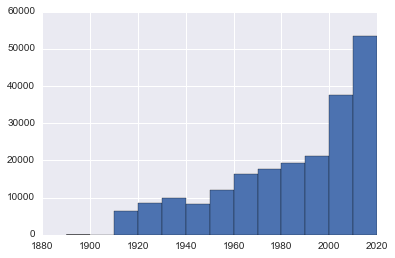

In [75]:
plt.hist(titles["year"], bins=range(1890,2030,10))

In [ ]:
cas

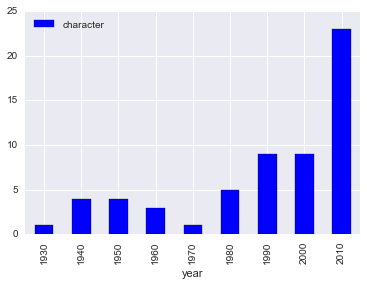

In [104]:
c = cast[['year', 'character']]
m = c['character'] == 'Batman'
c = c[m]


decs = c.year.map(lambda y: str(y)[0:3] + '0')

c['year'] = decs

c.groupby('year').count().plot(kind='bar')


#plt.hist(c[["year"]]) #, bins=range(1890,2030,10))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  2.,  2.,  3.,  1.,  2.,  2.,  2.,  0.,  2.,  2.,  1.,  2.,
         1.,  0.,  2.,  2.,  1.,  0.,  2.,  0.,  9.,  0.,  3.,  2.,  1.,
         2.,  1.,  2.,  6.,  2.,  0.,  3.,  1.,  0.,  0.]),
 array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
        1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
        1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
        2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
        2014, 2015, 2016, 2017, 2018, 2019]),
 <a list of 49 Patch objects>)

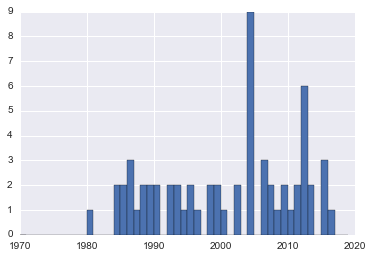

In [109]:
tom = cast[cast['name'] == "Tom Hanks"]["year"]
plt.hist(tom.values, bins=range(1970,2020))

In [112]:
xmas = release[release["title"] "Christmas"]
xmas

,title,year,country,date
